# Music Sentiment Analysis: Exploratory Data Analysis

This notebook provides an initial exploration of the music dataset spanning from 1950 to 2019, focusing on understanding the data structure, distribution, and preparing for sentiment analysis.


## Dataset Overview
- **Source**: Mendeley Music Dataset (1950-2019)
- **Focus**: Analyzing sentiment trends in music lyrics over 60 years
- **Features**: Lyrics, metadata, audio features, and emotion annotations



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import our data loading utilities
import sys
sys.path.append('../src')
from data.loader import load_music_dataset, get_dataset_info, filter_by_criteria


## 1. Data Loading and Initial Inspection


In [2]:
# Load the dataset
df = load_music_dataset('../data/tcc_ceds_music.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
df.head()


Data cleaning completed:
  - Removed 183 rows (0.6%)
  - Final dataset: 28189 songs
  - Year range: 1950-2019
  - Genres: 7 unique genres
Dataset loaded successfully: 28189 songs, 33 features
Dataset Shape: (28189, 33)

Column Names:
['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'topic', 'age', 'year', 'decade']


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,year,decade
0,0,mukesh,mohabbat bhi jhoothi,1950-01-01,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,1950,1950
1,4,frankie laine,i believe,1950-01-01,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,1950,1950
2,6,johnnie ray,cry,1950-01-01,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,1950,1950
3,10,pérez prado,patricia,1950-01-01,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,1950,1950
4,12,giorgos papadopoulos,apopse eida oneiro,1950-01-01,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,1950,1950


In [3]:
# Get detailed dataset information
info = get_dataset_info(df)

print("Dataset Information:")
print(f"Total songs: {info['total_songs']:,}")
print(f"Year range: {info['year_range'][0]}-{info['year_range'][1]}")
print(f"Unique artists: {info['artists']:,}")
print(f"Average lyrics length: {info['avg_lyrics_length']:.1f} words")
print(f"Unique genres: {len(info['genres'])}")


Dataset Information:
Total songs: 28,189
Year range: 1950-2019
Unique artists: 5,413
Average lyrics length: 73.5 words
Unique genres: 7


## 2. Temporal Distribution Analysis


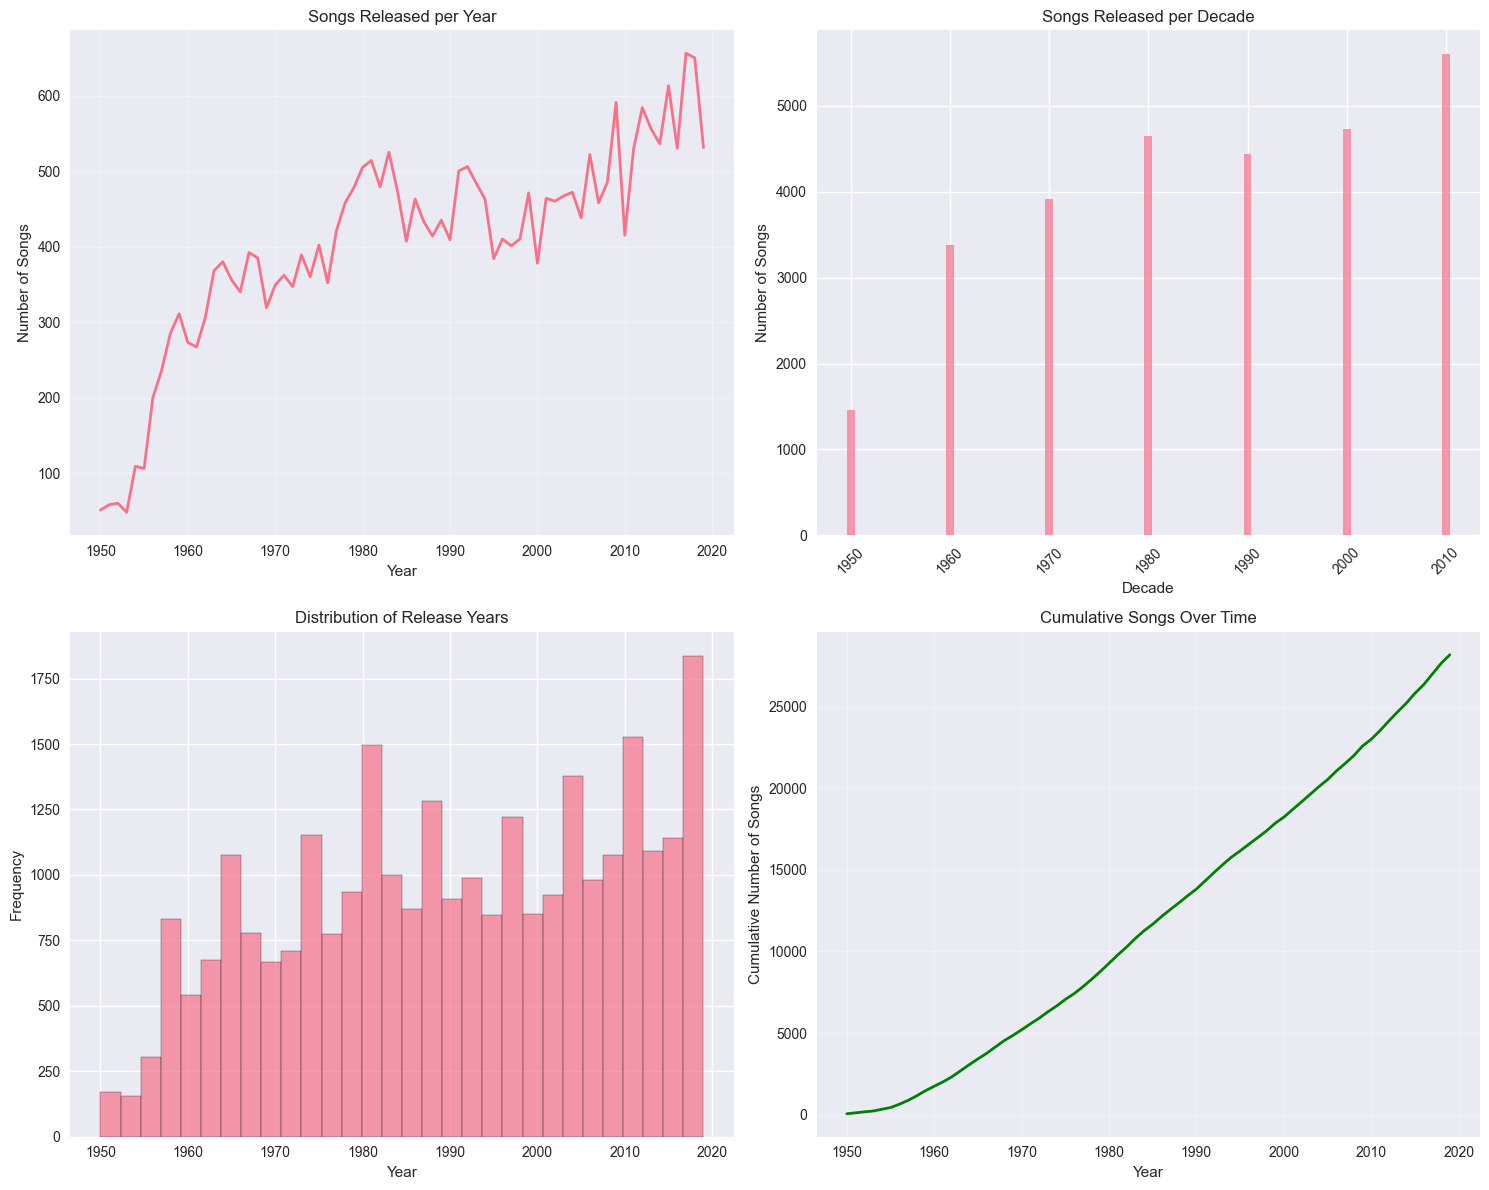

Year range: 1950-2019
Most songs in a year: 656 (2017)
Least songs in a year: 48 (1953)
Most songs in a decade: 5600 (2010s)


In [4]:
# Songs per year and decade analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Songs per year
yearly_counts = df['year'].value_counts().sort_index()
axes[0, 0].plot(yearly_counts.index, yearly_counts.values, linewidth=2)
axes[0, 0].set_title('Songs Released per Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Songs')
axes[0, 0].grid(True, alpha=0.3)

# Songs per decade
decade_counts = df['decade'].value_counts().sort_index()
axes[0, 1].bar(decade_counts.index, decade_counts.values, alpha=0.7)
axes[0, 1].set_title('Songs Released per Decade')
axes[0, 1].set_xlabel('Decade')
axes[0, 1].set_ylabel('Number of Songs')
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution of years
axes[1, 0].hist(df['year'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Release Years')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Frequency')

# Cumulative songs over time
cumulative_songs = yearly_counts.cumsum()
axes[1, 1].plot(cumulative_songs.index, cumulative_songs.values, linewidth=2, color='green')
axes[1, 1].set_title('Cumulative Songs Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Cumulative Number of Songs')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Year range: {df['year'].min()}-{df['year'].max()}")
print(f"Most songs in a year: {yearly_counts.max()} ({yearly_counts.idxmax()})")
print(f"Least songs in a year: {yearly_counts.min()} ({yearly_counts.idxmin()})")
print(f"Most songs in a decade: {decade_counts.max()} ({decade_counts.idxmax()}s)")


## 3. Genre Analysis


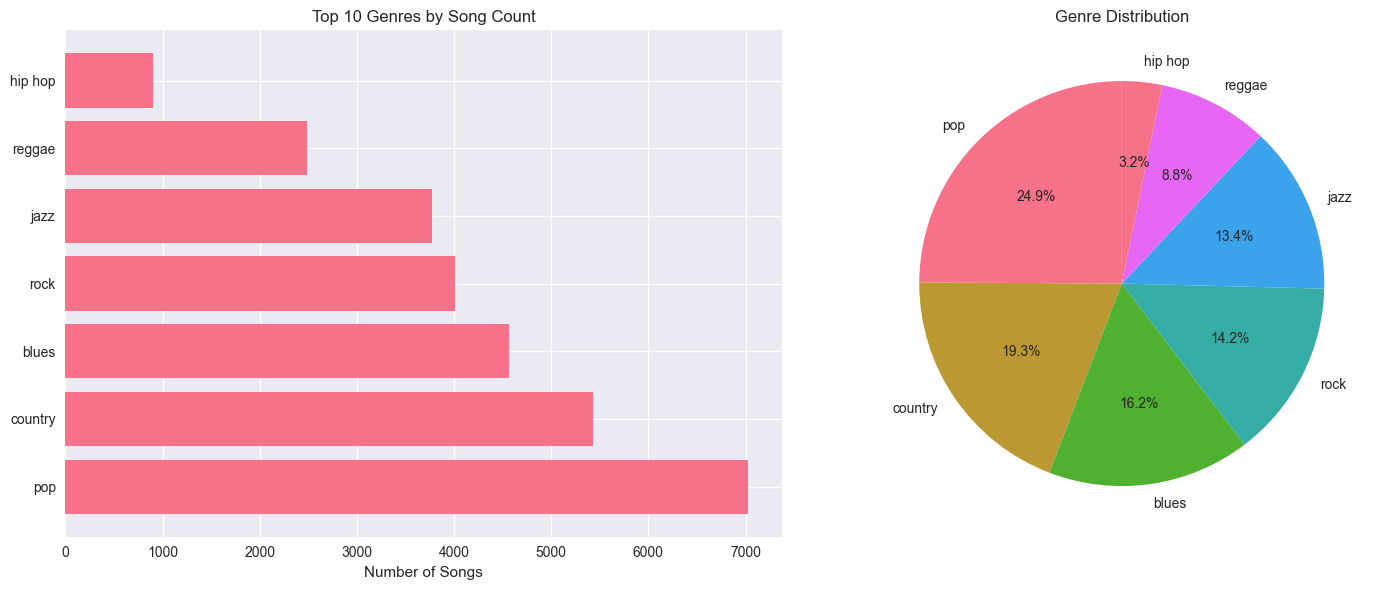

Total unique genres: 7

Top 10 genres:
 1. pop: 7,022 songs (24.9%)
 2. country: 5,431 songs (19.3%)
 3. blues: 4,564 songs (16.2%)
 4. rock: 4,012 songs (14.2%)
 5. jazz: 3,771 songs (13.4%)
 6. reggae: 2,487 songs (8.8%)
 7. hip hop: 902 songs (3.2%)


In [35]:
# Genre distribution
genre_counts = df['genre'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top genres
top_genres = genre_counts.head(10)
axes[0].barh(range(len(top_genres)), top_genres.values)
axes[0].set_yticks(range(len(top_genres)))
axes[0].set_yticklabels(top_genres.index)
axes[0].set_title('Top 10 Genres by Song Count')
axes[0].set_xlabel('Number of Songs')

# Genre distribution pie chart (top 8)
top_8_genres = genre_counts.head(8)
other_count = genre_counts.iloc[8:].sum()
if other_count > 0:
    pie_data = list(top_8_genres.values) + [other_count]
    pie_labels = list(top_8_genres.index) + ['Other']
else:
    pie_data = top_8_genres.values
    pie_labels = top_8_genres.index

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Genre Distribution')

plt.tight_layout()
plt.show()

print(f"Total unique genres: {len(genre_counts)}")
print(f"\nTop 10 genres:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"{i:2d}. {genre}: {count:,} songs ({count/len(df)*100:.1f}%)")


## 4. Lyrics Analysis


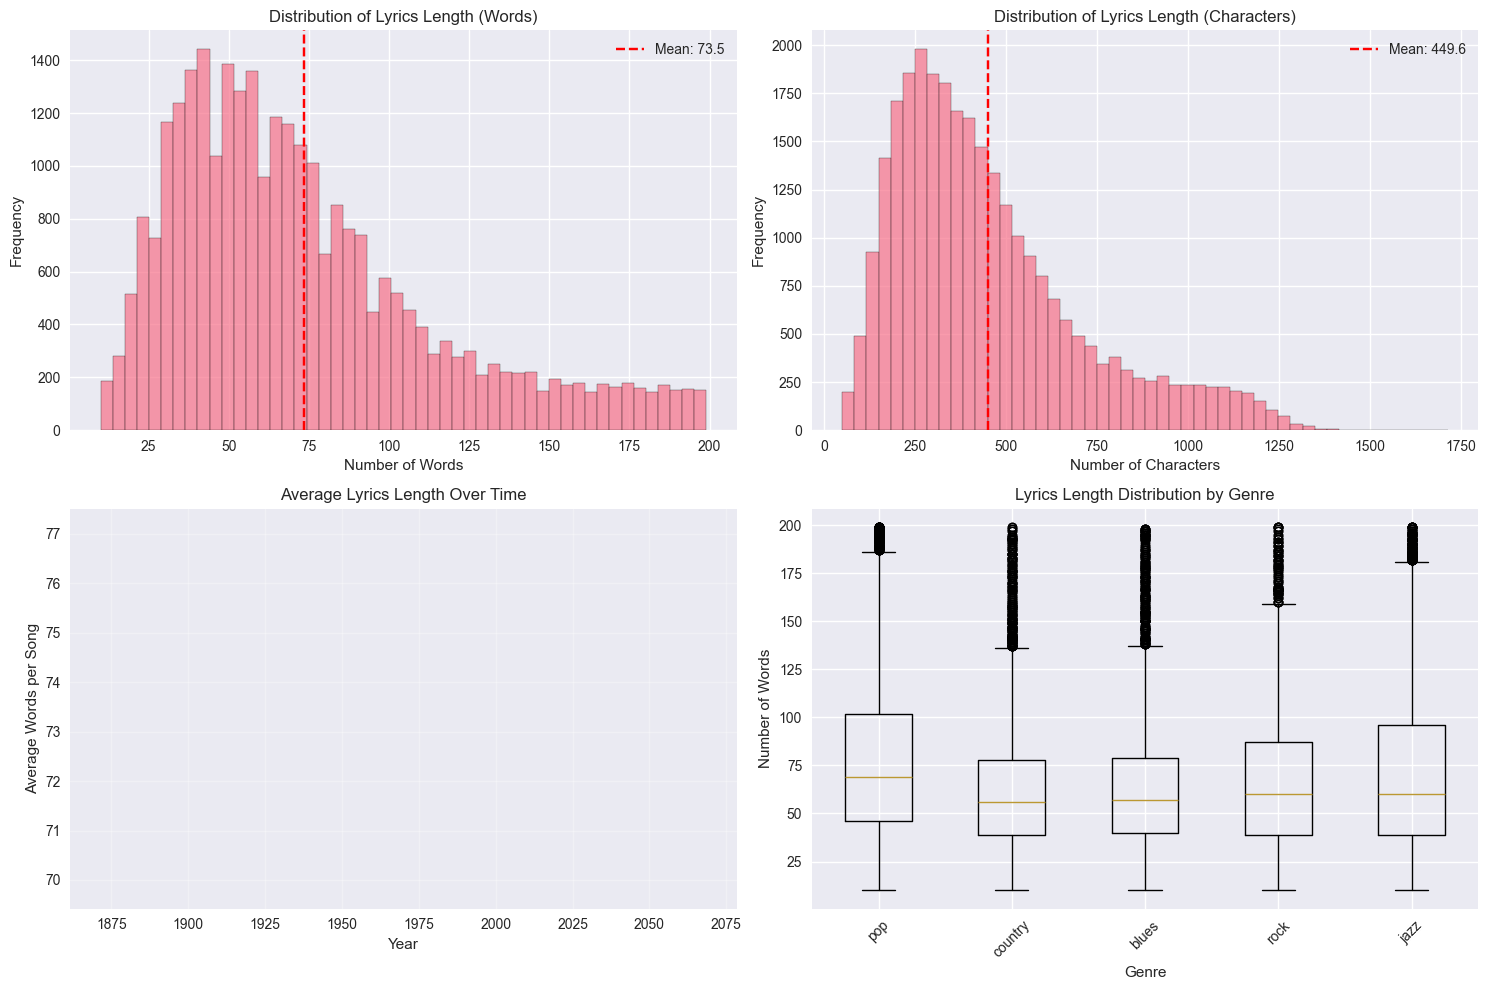

Lyrics Length Statistics:
Mean words per song: 73.5
Median words per song: 64.0
Min words per song: 10
Max words per song: 199
Mean characters per song: 449.6


In [36]:
# Analyze lyrics length
df['lyrics_length'] = df['lyrics'].str.split().str.len()
df['lyrics_char_length'] = df['lyrics'].str.len()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Word count distribution
axes[0, 0].hist(df['lyrics_length'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Lyrics Length (Words)')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['lyrics_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["lyrics_length"].mean():.1f}')
axes[0, 0].legend()

# Character count distribution
axes[0, 1].hist(df['lyrics_char_length'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Lyrics Length (Characters)')
axes[0, 1].set_xlabel('Number of Characters')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['lyrics_char_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["lyrics_char_length"].mean():.1f}')
axes[0, 1].legend()

# Lyrics length over time
yearly_avg_length = df.groupby('year')['lyrics_length'].mean()
axes[1, 0].plot(yearly_avg_length.index, yearly_avg_length.values, linewidth=2)
axes[1, 0].set_title('Average Lyrics Length Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Words per Song')
axes[1, 0].grid(True, alpha=0.3)

# Lyrics length by genre (top 5 genres)
top_5_genres = genre_counts.head(5).index
genre_length_data = []
for genre in top_5_genres:
    genre_data = df[df['genre'] == genre]['lyrics_length']
    genre_length_data.append(genre_data)

axes[1, 1].boxplot(genre_length_data, labels=top_5_genres)
axes[1, 1].set_title('Lyrics Length Distribution by Genre')
axes[1, 1].set_xlabel('Genre')
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("Lyrics Length Statistics:")
print(f"Mean words per song: {df['lyrics_length'].mean():.1f}")
print(f"Median words per song: {df['lyrics_length'].median():.1f}")
print(f"Min words per song: {df['lyrics_length'].min()}")
print(f"Max words per song: {df['lyrics_length'].max()}")
print(f"Mean characters per song: {df['lyrics_char_length'].mean():.1f}")


## 5. Data Quality Summary and Save


In [37]:
# Summary statistics
print("DATA QUALITY SUMMARY")
print("=" * 50)
print(f"Total songs: {len(df):,}")
print(f"Year range: {df['year'].min()}-{df['year'].max()}")
print(f"Unique artists: {df['artist_name'].nunique():,}")
print(f"Unique genres: {df['genre'].nunique()}")
print(f"Average lyrics length: {df['lyrics_length'].mean():.1f} words")
print(f"Songs with complete data: {len(df.dropna()):,} ({len(df.dropna())/len(df)*100:.1f}%)")

# Data completeness
print("\nDATA COMPLETENESS:")
completeness = (1 - df.isnull().sum() / len(df)) * 100
print(completeness.sort_values(ascending=False))

# Save processed data for next steps
df.to_csv('../data/processed/cleaned_music_dataset.csv', index=False)
print("\nCleaned dataset saved to '../data/processed/cleaned_music_dataset.csv'")

print("\nEDA completed successfully! Ready for sentiment analysis.")


DATA QUALITY SUMMARY
Total songs: 28,189
Year range: 1970-1970
Unique artists: 5,413
Unique genres: 7
Average lyrics length: 73.5 words
Songs with complete data: 28,189 (100.0%)

DATA COMPLETENESS:
Unnamed: 0                  100.0
instrumentalness            100.0
like/girls                  100.0
sadness                     100.0
feelings                    100.0
danceability                100.0
loudness                    100.0
acousticness                100.0
valence                     100.0
light/visual perceptions    100.0
energy                      100.0
topic                       100.0
age                         100.0
year                        100.0
decade                      100.0
lyrics_length               100.0
family/spiritual            100.0
movement/places             100.0
artist_name                 100.0
violence                    100.0
track_name                  100.0
release_date                100.0
genre                       100.0
lyrics              